In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [1]:
second = 198
print(f"{second//60} minutes {second%60} seconds")

3 minutes 18 seconds


In [4]:
minutes = 16
seconds = 00
print(f"{minutes*60+seconds} seconds")

960 seconds


In [5]:
!ls ../../../../../mnt/e/Deep\ Learning\ Analysis/Predictions/NOWOPAMDAY_310102_06_Model31

channelA_2024-05-31_00-00-36_48kHz.csv	channelA_2024-06-01_12-08-41_48kHz.csv
channelA_2024-05-31_00-05-36_48kHz.csv	channelA_2024-06-01_12-13-41_48kHz.csv
channelA_2024-05-31_00-10-36_48kHz.csv	channelA_2024-06-01_12-15-32_48kHz.csv
channelA_2024-05-31_00-12-27_48kHz.csv	channelA_2024-06-01_12-20-32_48kHz.csv
channelA_2024-05-31_00-17-27_48kHz.csv	channelA_2024-06-01_12-25-32_48kHz.csv
channelA_2024-05-31_00-22-27_48kHz.csv	channelA_2024-06-01_12-30-32_48kHz.csv
channelA_2024-05-31_00-27-27_48kHz.csv	channelA_2024-06-01_12-35-32_48kHz.csv
channelA_2024-05-31_00-32-27_48kHz.csv	channelA_2024-06-01_12-37-23_48kHz.csv
channelA_2024-05-31_00-34-18_48kHz.csv	channelA_2024-06-01_12-42-23_48kHz.csv
channelA_2024-05-31_00-39-18_48kHz.csv	channelA_2024-06-01_12-47-23_48kHz.csv
channelA_2024-05-31_00-44-18_48kHz.csv	channelA_2024-06-01_12-52-23_48kHz.csv
channelA_2024-05-31_00-49-18_48kHz.csv	channelA_2024-06-01_12-57-23_48kHz.csv
channelA_2024-05-31_00-54-18_48kHz.csv	channelA_2024-06-01_12-59

In [6]:
import pandas as pd

# Load CSV predictions.csv
df = pd.read_csv('../../../../../mnt/e/Deep Learning Analysis/Predictions/NOWOPAMDAY_310102_06_Model31/predictions.csv')
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,0,3,Background,0.968828,"[0.9688277840614319, 0.031172247603535652]"
1,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,3,6,Background,0.945064,"[0.9450639486312866, 0.05493602901697159]"
2,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,6,9,Background,0.974800,"[0.9747998714447021, 0.02520017698407173]"
3,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,9,12,Background,0.959510,"[0.9595096111297607, 0.04049030691385269]"
4,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,12,15,Background,0.967578,"[0.9675778746604919, 0.03242207691073418]"
...,...,...,...,...,...,...,...
86421,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,285,288,Background,0.952386,"[0.9523860812187195, 0.047613877803087234]"
86422,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,288,291,Background,0.950473,"[0.9504727125167847, 0.04952722415328026]"
86423,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,291,294,Background,0.960151,"[0.9601507782936096, 0.039849210530519485]"
86424,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,294,297,Background,0.974252,"[0.9742523431777954, 0.025747673586010933]"


In [7]:
CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    "Grampus_Risso'sDolphin": 3,
    'HarborPorpoise': 4,
    'KillerWhale': 5,
    'Long_FinnedPilotWhale': 6,
    'StripedDolphin': 7
}

## Define class mapping
CLASSES_MAPPING = {
    'Background': 0,
    'Whistle': 1,
}



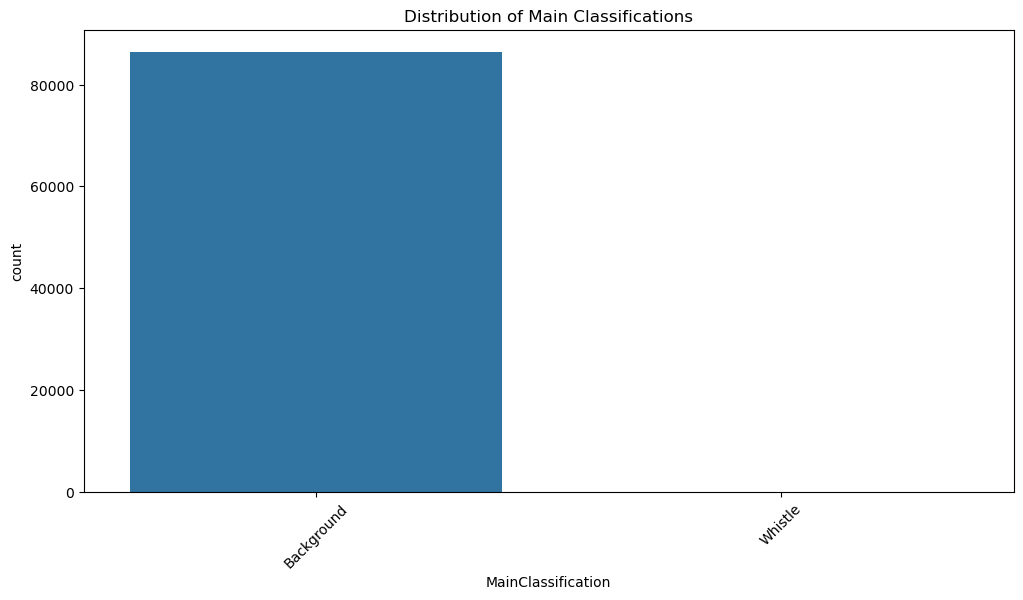

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of main classifications
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MainClassification', order=df['MainClassification'].value_counts().index)
plt.title('Distribution of Main Classifications')
plt.xticks(rotation=45)
plt.show()

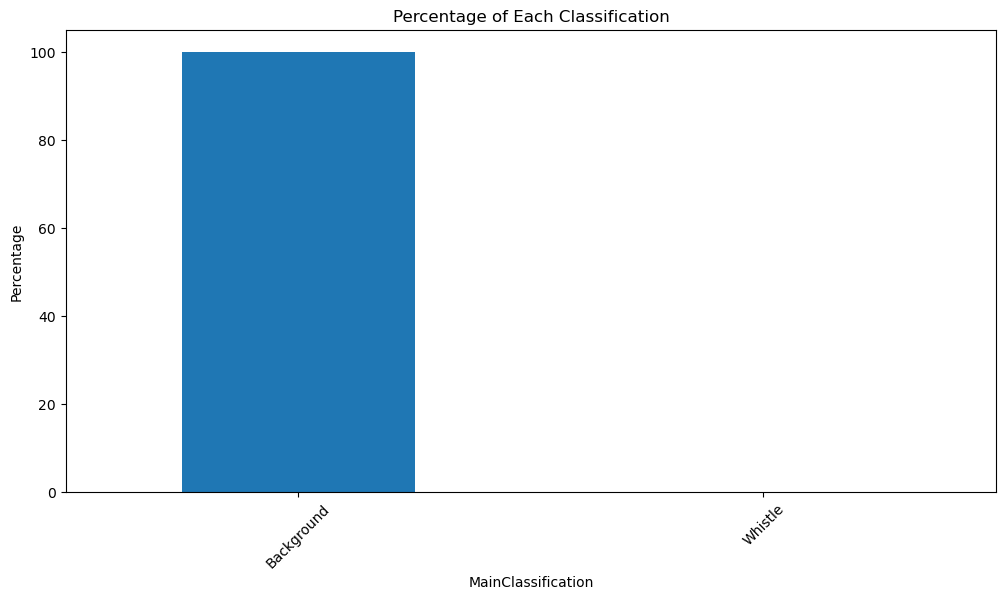

In [9]:
# Calculate the percentage of each classification
classification_counts = df['MainClassification'].value_counts(normalize=True) * 100

# Plot the percentage of each classification
plt.figure(figsize=(12, 6))
classification_counts.plot(kind='bar')
plt.title('Percentage of Each Classification')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

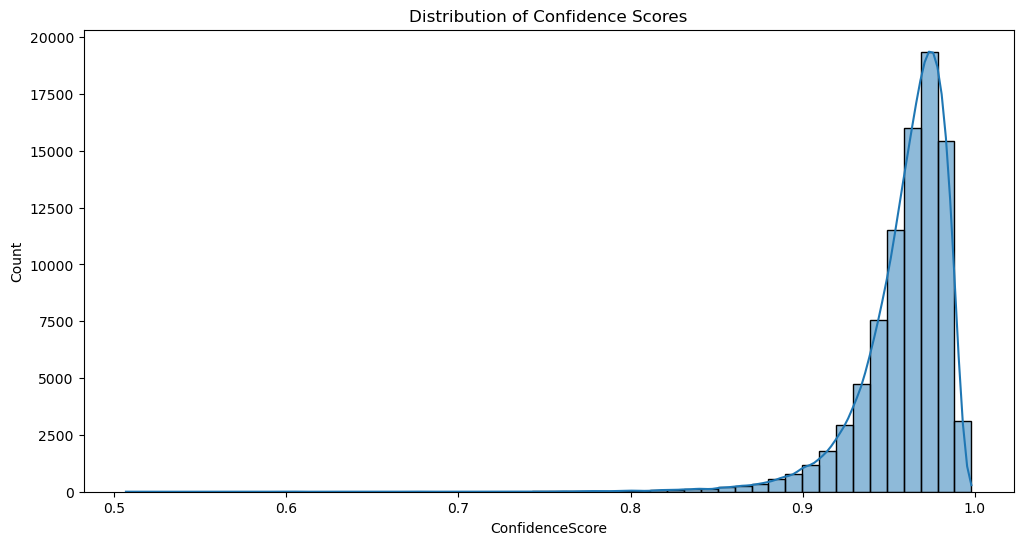

In [10]:
# Plot the distribution of confidence scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ConfidenceScore', bins=50, kde=True)
plt.title('Distribution of Confidence Scores')
plt.show()

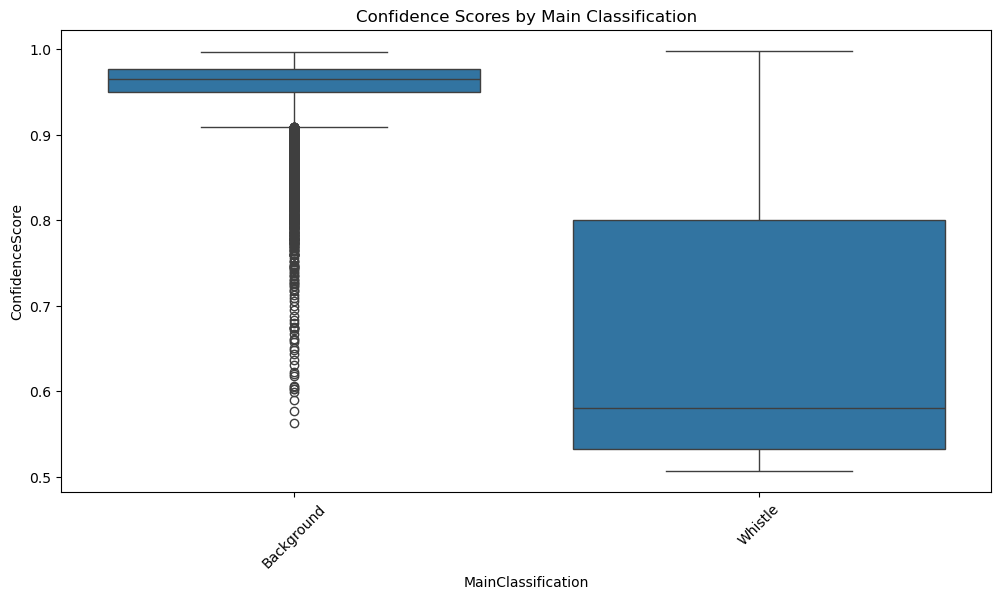

In [11]:
# Plot the confidence scores by main classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MainClassification', y='ConfidenceScore', order=df['MainClassification'].value_counts().index)
plt.title('Confidence Scores by Main Classification')
plt.xticks(rotation=45)
plt.show()

166


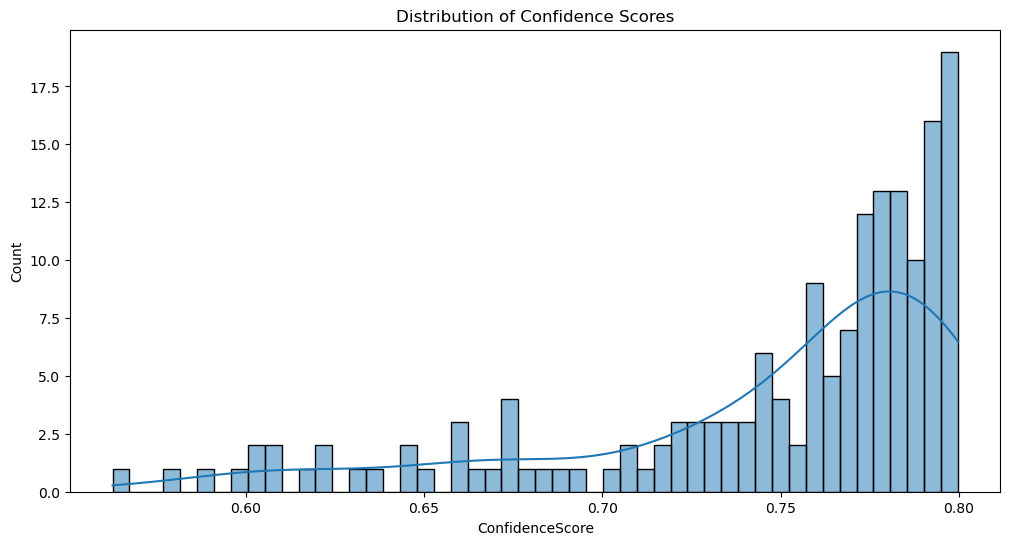

In [12]:
# Check how many Main Background have lower confidence score of 0.6
low_confidence = df[(df['MainClassification'] == 'Background') & (df['ConfidenceScore'] < 0.8)]

print(len(low_confidence))

# Plot the distribution of confidence scores
plt.figure(figsize=(12, 6))
sns.histplot(data=low_confidence, x='ConfidenceScore', bins=50, kde=True)
plt.title('Distribution of Confidence Scores')
plt.show()

In [13]:
# # Calculate the abundance of each classification per file
# abundance_per_file = df.groupby(['Filename', 'MainClassification']).size().unstack(fill_value=0)

# # Plot the abundance of each classification per file
# abundance_per_file.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.title('Abundance of Each Classification per File')
# plt.ylabel('Count')
# plt.xticks()
# plt.show()

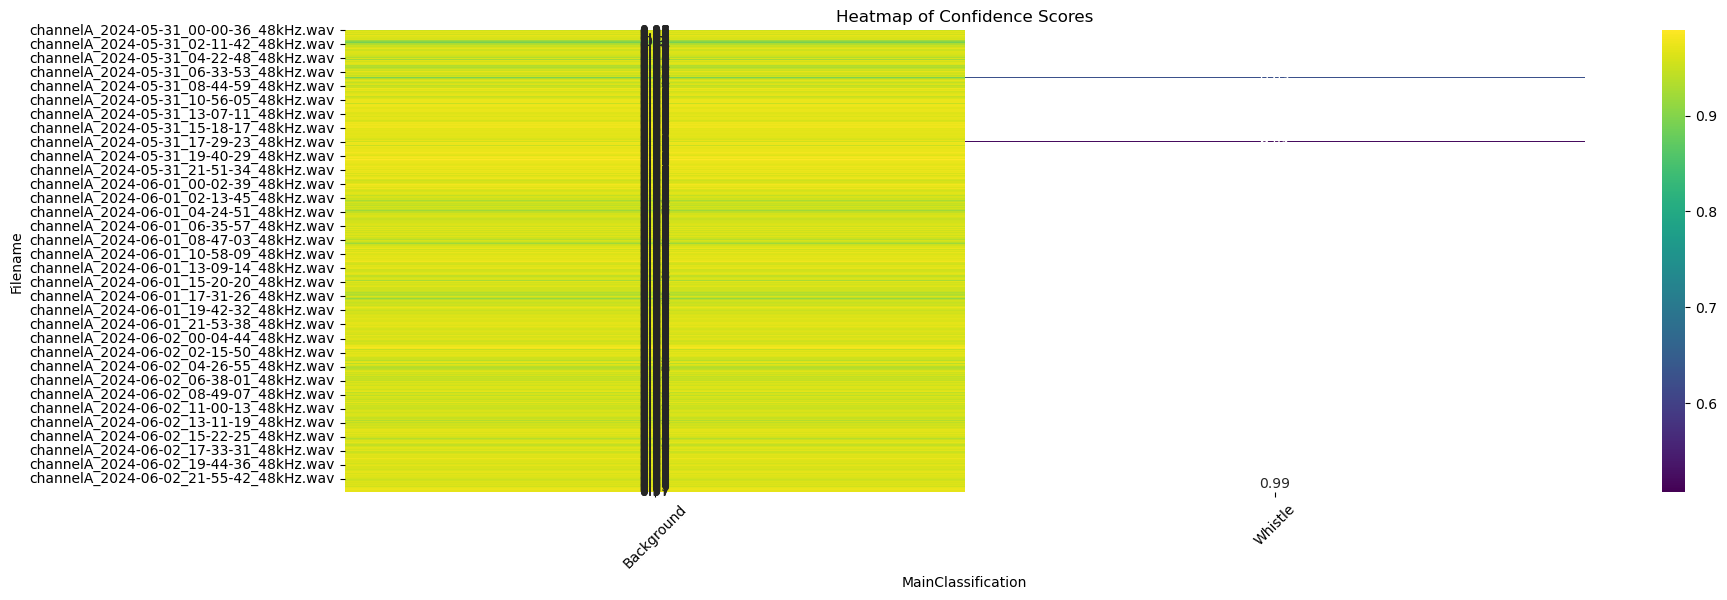

In [14]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Filename', columns='MainClassification', values='ConfidenceScore', aggfunc='mean')

# Plot the heatmap of confidence scores
plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of Confidence Scores')
plt.xticks(rotation=45)
plt.show()

In [15]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,0,3,Background,0.968828,"[0.9688277840614319, 0.031172247603535652]"
1,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,3,6,Background,0.945064,"[0.9450639486312866, 0.05493602901697159]"
2,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,6,9,Background,0.974800,"[0.9747998714447021, 0.02520017698407173]"
3,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,9,12,Background,0.959510,"[0.9595096111297607, 0.04049030691385269]"
4,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-05-31_00-00-36_48kHz.wav,12,15,Background,0.967578,"[0.9675778746604919, 0.03242207691073418]"
...,...,...,...,...,...,...,...
86421,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,285,288,Background,0.952386,"[0.9523860812187195, 0.047613877803087234]"
86422,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,288,291,Background,0.950473,"[0.9504727125167847, 0.04952722415328026]"
86423,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,291,294,Background,0.960151,"[0.9601507782936096, 0.039849210530519485]"
86424,../../../mnt/e/AudiosForAnalysis/NOWOPAMDAY_31...,channelA_2024-06-02_23-56-48_48kHz.wav,294,297,Background,0.974252,"[0.9742523431777954, 0.025747673586010933]"


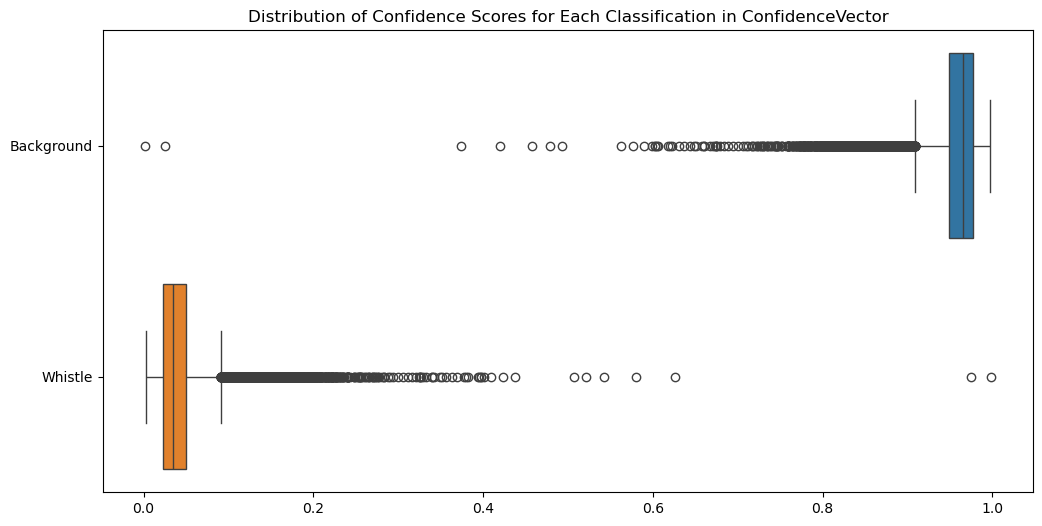

In [16]:
# Check the distribution of the confidence scores for each classification in ConfidenceVector
confidence_vector = df['ConfidenceVector'].apply(eval)
confidence_vector = pd.DataFrame(confidence_vector.tolist(), columns=CLASSES_MAPPING.keys())

plt.figure(figsize=(12, 6))
sns.boxplot(data=confidence_vector, orient='h')
plt.title('Distribution of Confidence Scores for Each Classification in ConfidenceVector')
plt.show()

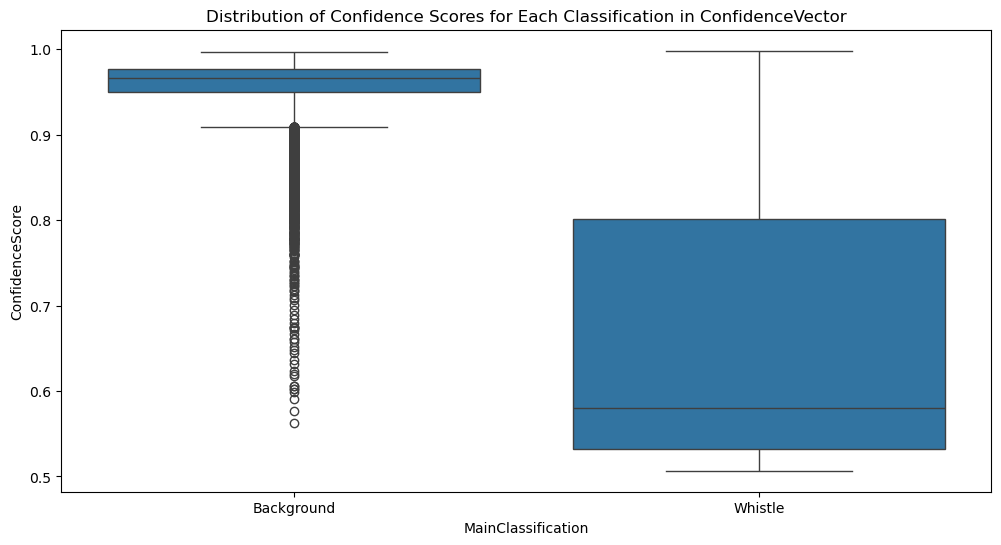

In [17]:
# Check the distribution of the confidence scores for each classification in ConfidenceVector
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MainClassification', y='ConfidenceScore')
plt.title('Distribution of Confidence Scores for Each Classification in ConfidenceVector')
plt.show()

In [18]:
# Load predictions file
# predictions_file = "predictions.csv"  # Replace with your actual file path
# predictions_df = pd.read_csv(predictions_file)

# Reverse mapping for easy lookup
IDX_TO_CLASSES = {v: k for k, v in CLASSES_MAPPING.items()}

In [19]:
def analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.5):
    results = []

    for _, row in df.iterrows():
        confidence_vector = eval(row['ConfidenceVector'])  # Convert string to list
        main_class_idx = np.argmax(confidence_vector)
        main_class_score = confidence_vector[main_class_idx]

        # Sort classes by confidence
        sorted_classes = sorted(
            enumerate(confidence_vector), key=lambda x: x[1], reverse=True
        )

        # Filter background if necessary
        if ignore_background:
            sorted_classes = [sc for sc in sorted_classes if sc[0] != CLASSES_MAPPING['Background']]

        # Filter by confidence threshold
        sorted_classes = [sc for sc in sorted_classes if sc[1] >= confidence_threshold]

        # Create a summary for this row
        summary = {
            'Filename': row['Filename'],
            'StartSecond': row['StartSecond'],
            'EndSecond': row['EndSecond'],
            'MainClassification': IDX_TO_CLASSES[main_class_idx],
            'MainConfidenceScore': main_class_score,
            'TopClasses': [
                {
                    'Class': IDX_TO_CLASSES[class_idx],
                    'Score': score
                }
                for class_idx, score in sorted_classes[:5]  # Top 5 classifications
            ]
        }
        results.append(summary)

    return results

# Analyze with and without background, using a confidence threshold of 0.5
# results_with_background = analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.3)
# results_without_background = analyze_confidence_vectors(df, ignore_background=True, confidence_threshold=0.3)

In [20]:
# Visualization function
def plot_top_classes(results, title):
    class_counts = {}

    for result in results:
        for entry in result['TopClasses']:
            class_name = entry['Class']
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Sort by frequency
    sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_counts)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# # Plot results
# print("Plotting results with background:")
# plot_top_classes(results_with_background, "Top Classes with Background")

# print("\nPlotting results without background:")
# plot_top_classes(results_without_background, "Top Classes without Background")

In [21]:
# Count number of rows per class
print(df['MainClassification'].value_counts())

MainClassification
Background    86419
Whistle           7
Name: count, dtype: int64


In [22]:
df_no_background = df[df['MainClassification'] != 'Background']
df_to_save = pd.concat([df_no_background, low_confidence])

In [23]:
df_to_save["Path"] = df_to_save["Path"].str.split("/mnt/e/").str[1]
df_to_save

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
8925,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-05-31_07-22-35_48kHz.wav,255,258,Whistle,0.626470,"[0.373529851436615, 0.626470148563385]"
20847,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-05-31_17-19-23_48kHz.wav,213,216,Whistle,0.521635,"[0.4783647358417511, 0.5216352939605713]"
21736,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-05-31_18-03-05_48kHz.wav,258,261,Whistle,0.506723,"[0.4932766556739807, 0.5067233443260193]"
31034,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-01_01-51-54_48kHz.wav,21,24,Whistle,0.542353,"[0.4576473832130432, 0.5423526763916016]"
73394,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_13-06-19_48kHz.wav,234,237,Whistle,0.580354,"[0.41964584589004517, 0.5803542137145996]"
...,...,...,...,...,...,...,...
81744,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_20-06-27_48kHz.wav,75,78,Background,0.770711,"[0.7707110643386841, 0.22928893566131592]"
82126,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_20-23-18_48kHz.wav,210,213,Background,0.759263,"[0.7592628598213196, 0.2407371699810028]"
82162,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_20-28-18_48kHz.wav,18,21,Background,0.792104,"[0.7921044826507568, 0.20789554715156555]"
82330,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_20-33-18_48kHz.wav,222,225,Background,0.792829,"[0.7928289175033569, 0.20717108249664307]"


In [24]:
# save new csv without rows with background
df_to_save.to_csv('../../../../../mnt/e/Deep Learning Analysis/Predictions/NOWOPAMDAY_310102_06_Model31/predictions_to_validate.csv', index=False)

In [116]:
df[df["MainClassification"] == "Whistle"]

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
8925,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-05-31_07-22-35_48kHz.wav,255,258,Whistle,0.626470,"[0.373529851436615, 0.626470148563385]"
20847,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-05-31_17-19-23_48kHz.wav,213,216,Whistle,0.521635,"[0.4783647358417511, 0.5216352939605713]"
21736,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-05-31_18-03-05_48kHz.wav,258,261,Whistle,0.506723,"[0.4932766556739807, 0.5067233443260193]"
31034,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-01_01-51-54_48kHz.wav,21,24,Whistle,0.542353,"[0.4576473832130432, 0.5423526763916016]"
73394,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_13-06-19_48kHz.wav,234,237,Whistle,0.580354,"[0.41964584589004517, 0.5803542137145996]"
84940,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_22-44-24_48kHz.wav,186,189,Whistle,0.974900,"[0.025100169703364372, 0.9748997688293457]"
84941,AudiosForAnalysis/NOWOPAMDAY_310102_06_DownSam...,channelA_2024-06-02_22-44-24_48kHz.wav,189,192,Whistle,0.998106,"[0.0018936825217679143, 0.9981062412261963]"
